In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, silhouette_score

In [29]:
dataset = pd.read_csv("https://raw.githubusercontent.com/leenaali1114/Titanic-Dataset/main/Titanic_Dataset.csv")

In [30]:
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [31]:
dataset.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1299,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1300,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1301,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1302,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
1303,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [8]:
dataset.shape

(1309, 12)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [32]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


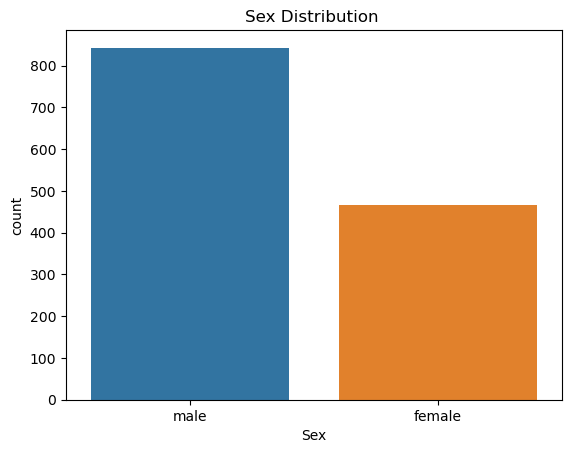

In [13]:
sns.countplot(x='Sex',data=dataset)
plt.title('Sex Distribution ')
plt.show()

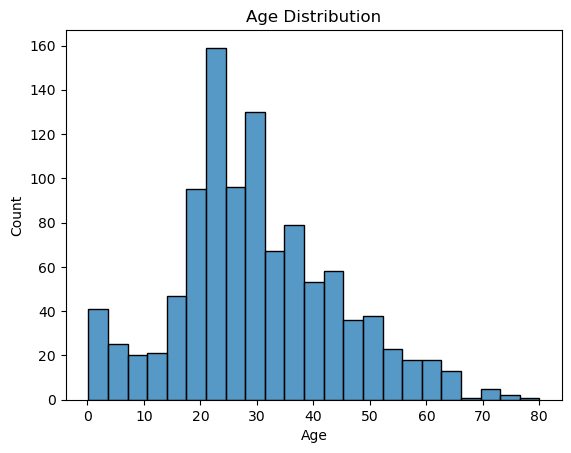

In [14]:
sns.histplot(dataset['Age'])
plt.title('Age Distribution')
plt.show()

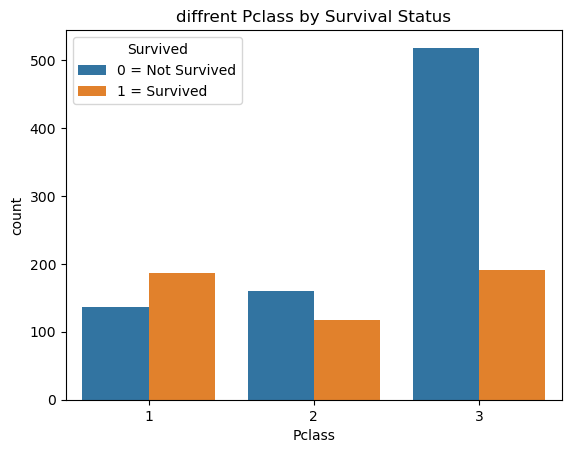

In [15]:
sns.countplot(x='Pclass',data=dataset,hue='Survived')
legend_labels = {0: 'Not Survived', 1: 'Survived'}
plt.legend(title='Survived', labels=[f"{key} = {value}" for key, value in legend_labels.items()])
plt.title('diffrent Pclass by Survival Status')
plt.show()

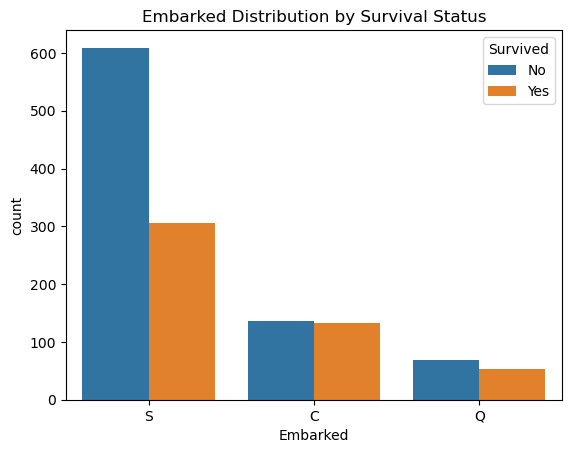

In [18]:
sns.countplot(x='Embarked',data=dataset,hue='Survived')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.title('Embarked Distribution by Survival Status')
plt.show()

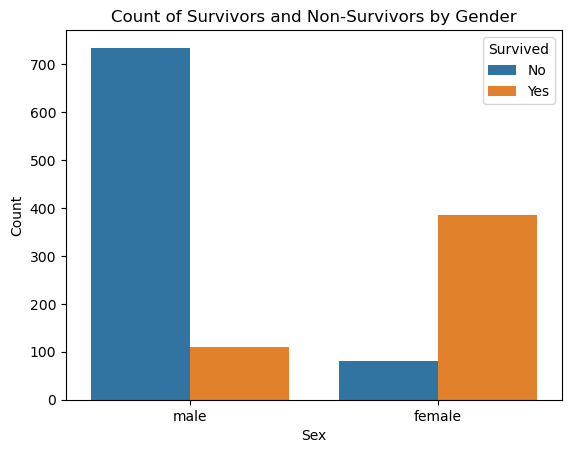

In [19]:
sns.countplot(x='Sex', data=dataset, hue='Survived')

# Set plot labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Survivors and Non-Survivors by Gender')

# Add a legend to distinguish survivors (1) and non-survivors (0)
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

In [33]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
dataset = dataset.drop(['PassengerId','Name','SibSp','Ticket','Fare','Cabin','Parch'],axis =1)

In [35]:
dataset.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [36]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         263
Embarked      2
dtype: int64

In [38]:
mean_age = dataset['Age'].mean()
mean_age

29.881137667304014

In [39]:
dataset["Age"].fillna(mean_age, inplace=True)

In [40]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    2
dtype: int64

In [42]:
dataset.dropna(subset=['Embarked'], inplace=True)

In [43]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [45]:
dataset.groupby('Survived').size()

Survived
0    815
1    492
dtype: int64

In [47]:
dataset['Sex'].unique()

array(['male', 'female'], dtype=object)

male - 0        female - 1

In [49]:
prof = {"male":0,'female':1, }
dataset['Sex'] = dataset['Sex'].map(prof)

In [50]:
dataset

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.000000,S
1,1,1,1,38.000000,C
2,1,3,1,26.000000,S
3,1,1,1,35.000000,S
4,0,3,0,35.000000,S
...,...,...,...,...,...
1304,0,3,0,29.881138,S
1305,1,1,1,39.000000,C
1306,0,3,0,38.500000,S
1307,0,3,0,29.881138,S


In [51]:
dataset['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

s=0.    c=1.    q=2

In [52]:
prof = {"S":0,'C':1,'Q':2 }
dataset['Embarked'] = dataset['Embarked'].map(prof)

In [53]:
dataset

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.000000,0
1,1,1,1,38.000000,1
2,1,3,1,26.000000,0
3,1,1,1,35.000000,0
4,0,3,0,35.000000,0
...,...,...,...,...,...
1304,0,3,0,29.881138,0
1305,1,1,1,39.000000,1
1306,0,3,0,38.500000,0
1307,0,3,0,29.881138,0


In [55]:
from sklearn.utils import resample

ds_m = dataset[(dataset['Survived']==0)] 
ds_f = dataset[(dataset['Survived']==1)] 



ds_f_upsampled = resample(ds_f, 
                                 replace=True,    # sample with replacement
                                 n_samples= 815, # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
dataset = pd.concat([ds_m,ds_f_upsampled])

In [56]:
dataset

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.000000,0
4,0,3,0,35.000000,0
5,0,3,0,29.881138,2
6,0,1,0,54.000000,0
7,0,3,0,2.000000,0
...,...,...,...,...,...
599,1,1,0,49.000000,1
865,1,2,1,42.000000,0
376,1,3,1,22.000000,0
608,1,2,1,22.000000,1


In [57]:
dataset.groupby('Survived').size()

Survived
0    815
1    815
dtype: int64

In [63]:
x = dataset.iloc[:,1:5].values
y = dataset.iloc[:,0].values

In [64]:
x

array([[ 3.        ,  0.        , 22.        ,  0.        ],
       [ 3.        ,  0.        , 35.        ,  0.        ],
       [ 3.        ,  0.        , 29.88113767,  2.        ],
       ...,
       [ 3.        ,  1.        , 22.        ,  0.        ],
       [ 2.        ,  1.        , 22.        ,  1.        ],
       [ 1.        ,  1.        , 32.        ,  1.        ]])

In [65]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [67]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (1141, 4)
y_train:  (1141,)
x_test:  (489, 4)
y_test:  (489,)


# Logistic Regression

In [68]:
model_lr = LogisticRegression(max_iter = 600)

In [69]:
model_lr.fit(x_train, y_train)

LogisticRegression(max_iter=600)

In [70]:
y_pred_lr = model_lr.predict(x_test)

In [71]:
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.8629856850715747


# K Nearest Neighbors Classifier

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
model_knn = KNeighborsClassifier()

In [74]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [75]:
y_pred_knn = model_knn.predict(x_test)

In [76]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

Accuracy :  0.7934560327198364


# Decision Tree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
model_dt = DecisionTreeClassifier()

In [79]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [80]:
y_pred_dt = model_dt.predict(x_test)

In [81]:
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

Accuracy :  0.8588957055214724


# Naive Bayes Classifier

In [82]:
from sklearn.naive_bayes import GaussianNB

In [83]:
model_nb = GaussianNB()

In [84]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [85]:
y_pred_nb = model_nb.predict(x_test)

In [86]:
print("Accuracy : ", accuracy_score(y_test, y_pred_nb))

Accuracy :  0.8507157464212679


# Support Vector Machine

In [87]:
from sklearn.svm import SVC

In [88]:
model_svc = SVC(gamma='auto')

In [89]:
model_svc.fit(x_train,y_train)

SVC(gamma='auto')

In [90]:
y_pred_svc = model_nb.predict(x_test)

In [91]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.8507157464212679


# Random Forest Classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)

In [94]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [95]:
y_pred_rf = model_nb.predict(x_test)

In [96]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.8507157464212679


# Prediction

In [98]:
Xnew = [[1,1,25,0]]

ynew =  model_lr.predict(Xnew)

print(ynew)

[1]


In [99]:
Xnew = [[3,0,45,2]]

ynew =  model_lr.predict(Xnew)

print(ynew)

[0]


In [97]:
dataset.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.000000,0
4,0,3,0,35.000000,0
5,0,3,0,29.881138,2
6,0,1,0,54.000000,0
7,0,3,0,2.000000,0
